# 2018 - 09 - 20 (jueves)

## 27 septiembre
    - Propuesta proyecto
## 4 octubre
    - Tarea 3
    - Presentación proyectos

---

## Algunos ejercicios en Pandas

### 1. Cargue Casen y obtenga estadisticas básicas

In [1]:
import pandas as pd

df = pd.read_stata(r'C:\Users\calvarad\Sync\Clase Data Science\Datos\casen_2017_stata\Casen 2017.dta', convert_categoricals=False)

In [ ]:
df.columns

In [ ]:
df.describe

### 2. Calcule el número de personas por region



In [33]:
df['persona'] = 1
grouped = df.groupby('region')

por_region = grouped[['persona']].sum()

por_region

,persona
region,
1.0,10150
2.0,8510
3.0,6961
4.0,9952
5.0,19625
6.0,15862
7.0,15208
8.0,21532
9.0,15481


### 3. Haga un grafico circular con el número de personas por región

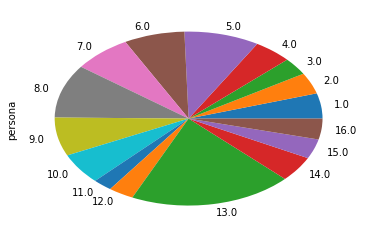

In [35]:
import matplotlib.pyplot as plt

por_region.plot.pie(y='persona', legend=False)

plt.show()

### 4. Repita el gráfico anterior, considerando el factor de expansión regional

In [36]:
df['pers_factor'] = 1 * df['expr']
grouped = df.groupby('region')

por_region_expr = grouped[['pers_factor']].sum()

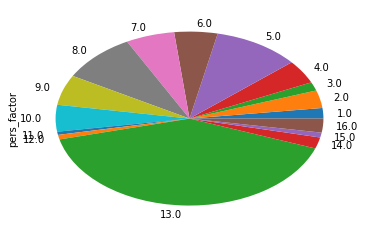

In [38]:
por_region_expr.plot.pie(y='pers_factor', legend=False)
plt.show()

### 5. ¿cuáles regiones están más o menos representadas? (ver ratio entre poblaciones)


In [39]:
# grouped = df.groupby('region')
# por_region_expr = grouped[['persona', 'pers_factor']].sum()

por_region_expr['ratio'] = por_region_expr.pers_factor / por_region.persona

por_region_expr.sort_values(by=['ratio'], ascending=False, inplace=True)

por_region_expr

,pers_factor,ratio
region,,
13.0,7223236.0,169.555550
5.0,1856498.0,94.598624
4.0,775198.0,77.893690
8.0,1625099.0,75.473667
10.0,882790.0,70.952419
2.0,586198.0,68.883431
7.0,1047293.0,68.864611
9.0,999730.0,64.577870
6.0,929632.0,58.607490


### 5. Muestre un gráfico de barra, por región, con el porcentaje de mujeres de la región (usar factor exp regional)

Primero, necesitamos saber qué variable identifica el sexo de las personas..

De la documentación de la Casen 2017, se puede ver lo siguiente:

| numero | etiqueta | observaciones |
|---|---|---|---|
| 1 | Hombre | 103.322|
|2 | Mujer | 113.117
| | Total | 216.439 

Detalle:

http://observatorio.ministeriodesarrollosocial.gob.cl/casen-multidimensional/casen/docs/Libro_de_Codigos_Casen_2017.pdf

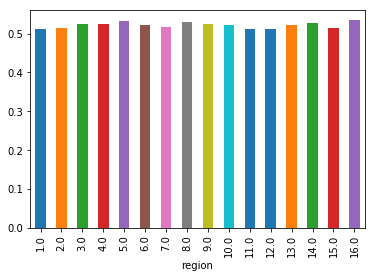

In [11]:
#seleccionamos a las mujeres

df['mujer'] = df['sexo'] == 2

#"aumentamos" segun factor de expansion

df['mujer_exp'] = df.mujer * df.expr

#colapsamos por region
group_por_region = df.groupby('region')

por_region_expr = grouped[['mujer_exp', 'pers_factor']].sum()

#calculamos porcentaje
por_region_expr['Porcentaje Mujeres'] = por_region_expr.mujer_exp / por_region_expr.pers_factor

#graficamos

por_region_expr['Porcentaje Mujeres'].plot.bar(y='pers_factor')
plt.show()

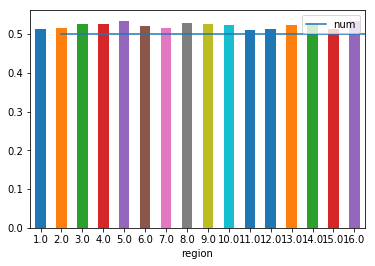

In [16]:

ax = por_region_expr['Porcentaje Mujeres'].plot.bar(y='pers_factor')

por_region_expr['num'] = 0.5

por_region_expr.plot(y='num', ax=ax)
plt.show()

In [17]:
por_region_expr

,mujer_exp,pers_factor,Porcentaje Mujeres,num
region,,,,
1.0,177810.0,346917.0,0.512543,0.5
2.0,302290.0,586198.0,0.515679,0.5
3.0,149403.0,284814.0,0.524563,0.5
4.0,406945.0,775198.0,0.524956,0.5
5.0,990040.0,1856498.0,0.533284,0.5
6.0,484942.0,929632.0,0.521649,0.5
7.0,540698.0,1047293.0,0.516281,0.5
8.0,859657.0,1625099.0,0.528987,0.5
9.0,525050.0,999730.0,0.525192,0.5


### 5. Propuesto: Qué regiones están sobre o sub representadas, respecto de los totales de población del Censo 2017?

In [ ]:
# calculamos porcentajes de población por region

# por_region_expr['total_pob'] = sum(por_region_expr.pers_factor)

# unimos con datos del Censo
